# Vision Transformers

copyright 2022, Denis Rothman, MIT License



#DALL-E
Reference, OpenAI:
https://github.com/openai/DALL-E/blob/master/notebooks/usage.ipynb



In [ ]:
!pip install folium==0.2.1
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html ftfy regex
!pip install DALL-E
!pip install ftfy
!git clone https://github.com/openai/CLIP.git
%cd /content/CLIP/

     |████████████████████████████████| 69 kB 2.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=f3726bbaa8ad7b2778cf644a64795f9476db82ccde48a99fa39d8556b9e121b4
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 39.2 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    

Notes:<br>

**Generative Pre-trained Transformer(GPT)**

GPT is **Autoregressive** making predictions based on past values: prompt + completion. It is decoder-only model.

Each image token can attend to all of the text tokens in the model. The model contains **64 attention layers** and 12 billions parameters.

A **generative** model use joint probability distributions to produce new instances: p(X,Y) or P(X) if there are no labels <br>

A discriminative model discriminates between different instances in is based on a condition probablity p(Y|X)

In DALL-E, **identity mapping** will enable data to flow through the layers with residual functions, retaining information throughout the layers.


In [ ]:
import io
import os, sys
import requests
import PIL

import torch
import torchvision.transforms as T
import torchvision.transforms.functional as TF

from dall_e          import map_pixels, unmap_pixels, load_model
from IPython.display import display, display_markdown

target_image_size = 256

def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return PIL.Image.open(io.BytesIO(resp.content))

def preprocess(img):
    s = min(img.size)

    if s < target_image_size:
        raise ValueError(f'min dim for image {s} < {target_image_size}')

    r = target_image_size / s
    s = (round(r * img.size[1]), round(r * img.size[0]))
    img = TF.resize(img, s, interpolation=PIL.Image.LANCZOS)
    img = TF.center_crop(img, output_size=2 * [target_image_size])
    img = torch.unsqueeze(T.ToTensor()(img), 0)
    return map_pixels(img)

In [ ]:
# This can be changed to a GPU, e.g. 'cuda:0'.
dev = torch.device('cpu')

# For faster load times, download these files locally and use the local paths instead.
enc = load_model("https://cdn.openai.com/dall-e/encoder.pkl", dev)
dec = load_model("https://cdn.openai.com/dall-e/decoder.pkl", dev)

In [ ]:
enc

In [ ]:
dec

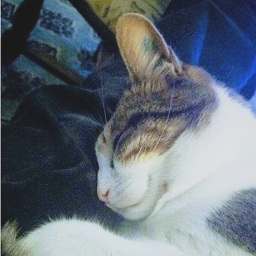

In [ ]:
#Image of cat, creator and copyright Denis Rothman
x=preprocess(download_image('https://github.com/Denis2054/AI_Educational/blob/master/mycat.jpg?raw=true'))
display_markdown('Original image:')
display(T.ToPILImage(mode='RGB')(x[0]))

**September 10, 2023 update**

There are conflicts between the code requiring older versions of modules and the installed libraries.

[You can generate images with DALL-E 2 Notebook](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Chapter17/Getting_Started_with_the_DALL_E_2_API.ipynb)   

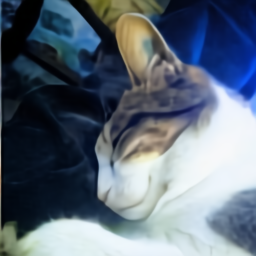

In [ ]:
"""
import torch.nn.functional as F

z_logits = enc(x)
z = torch.argmax(z_logits, axis=1)
z = F.one_hot(z, num_classes=enc.vocab_size).permute(0, 3, 1, 2).float()

x_stats = dec(z).float()
x_rec = unmap_pixels(torch.sigmoid(x_stats[:, :3]))
x_rec = T.ToPILImage(mode='RGB')(x_rec[0])

display_markdown('Reconstructed image:')
display(x_rec)
"""